## Curso: Machine Learning e Imágenes en Python
* Docentes: Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Ayudantes: Catherine Acuña y Joaquín Funes
* Colaboran: Ing. Juan Manuel López
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio


### CLASE 5:
### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	**Histograma. Mejora de la imagen: contraste,** filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.

Archivos necesarios para la notebook: 'daisy.jpg', 'lenna.jpg','pout.png' y 'ortopantomografia2.png'



### Mejora de la Imagen

* Acentuar algunas características de la imagen, por ejemplo: bordes, contraste. Este objetivo implica un grado de juicio subjetivo acerca de la calidad resultante, dependerá de la operación y la aplicación en cuestión.

* La mejora de una imagen no busca agregar información, sino que, por ejemplo, la resalta.

* Un método no es siempre útil para resolver todos los problemas similares.

* Los resultados pueden producir una imagen diferente a la original, se pueden sacrificar algunos aspectos para mejorar otros, nunca agrega información.

### Métodos de mejora según el dominio:
+ Existen métodos en el Dominio Espacial o en el de Frecuencia, así como en otros dominios. En este curso nos focalizaremos en el dominio espacial.
Considerando una imagen monocromáticas 2D:  

T: imagen f de entrada ------> imagen g de salida            

                      
**Mejora punto a punto (lugar a lugar/ pixel a pixel): **
    
    r=f(i,j) ------> T(r)= g(i,j)
    
            r ----->  T(r)
            
            r= nivel de gris de la imagen original y
            T(r)= nuevo valor, nivel de gris de la imagen modificada
            


## Importamos las librerías necesarias

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


# Histograma

### Es una representación de la distribución de los niveles de grises en una imagen.

### Dado un determinado nivel de gris, el histograma muestra la cantidad de píxeles que tienen dicha intensidad.

### Muestra gráficamente el vector de frecuencias de las intensidades presentes en la imagen.



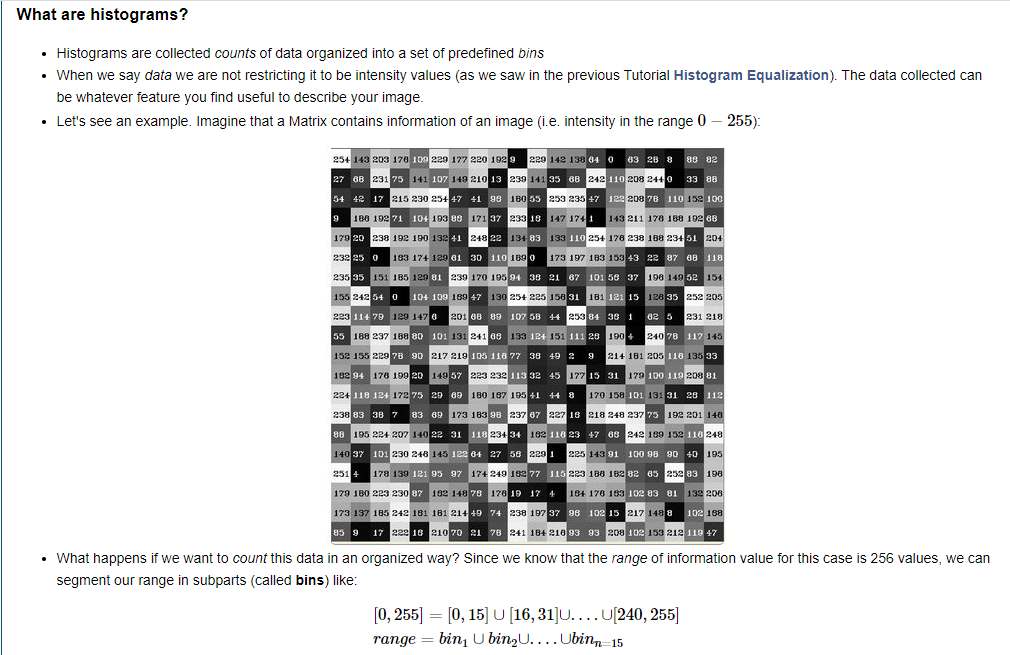

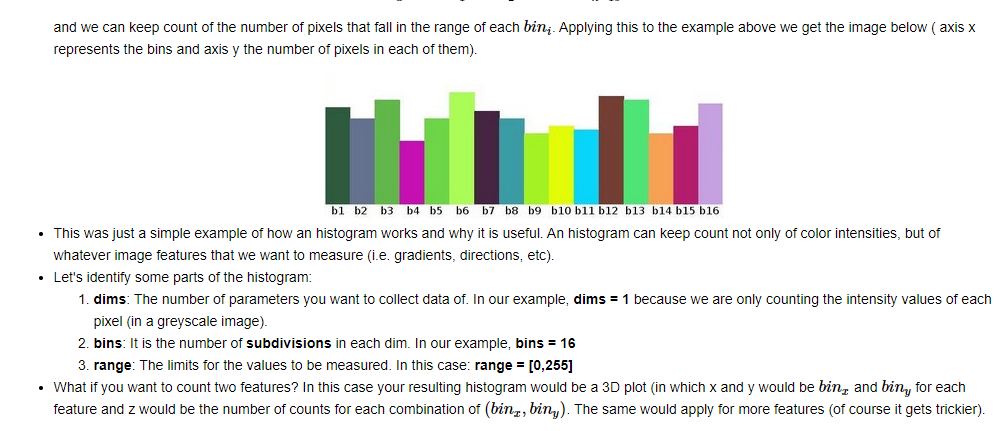


https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html

## Ejemplos Histogramas


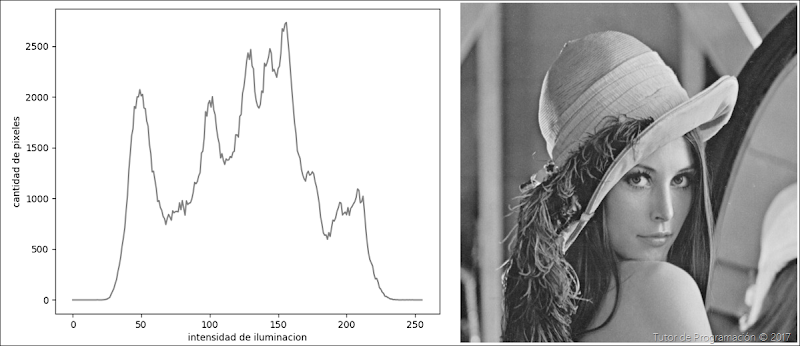

## Observaciones sobre Histogramas




*   **Rango dinámico de una imagen** es el intervalo de intensidades que alcanza dicha imagen, es decir [min, max].

* Cuando el rango dinámico es pequeño se trata de imágenes con poco contraste.

* Cuando el rango dinámico es grande se trata de imágenes con mucho contraste.

* Cuando el histograma posee altos valores en los extremos de la escala (forma de “U”) la imagen está saturada.

* Cuando el histograma está corrido hacia la derecha, la imagen es clara

* Cuando el histograma está corrido hacia la izquierda, la imagen es oscura

**Histograma Saturado**
Se pierden detalles de la imagen


Más ejemplos:
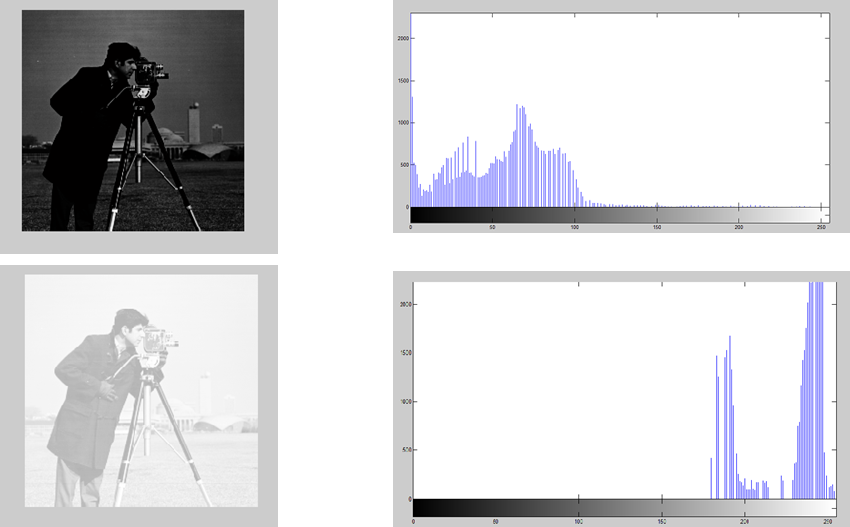

### Bins
" The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size."

Cita: https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

Las intensidades se pueden agrupar. Por ejemplo, encontrar cuántos píxeles pertenecen a los intervalos de intensidades [0,16) [16,32)...




**Histogramas con Python: librerías numpy, cv2 o matplotlib**

numpy tiene una función para calcular el histograma, calcula el histograma de cualquier tipo de dato, parece que no es rápida

Con Open cv, está pensado para histograma de imágenes (Monocroma o RGB):

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- Devuelve un vector
- El nombre de la imagen debe estar entre corchetes
- Channels indica para qué canal se pide el histograma. Puede ser 0, 1 o 2.
- Si la imagen es gris/monocroma se pone 0.
- Si el histograma es de la imagen completa se coloca como máscara None.
- Se puede pedir el histograma de una parte de la imagen, mediante una máscara.
- histsize indica la cantidad de bins. Si queremos contabilizar la frecuencia de todas las intensidades y tenemos 256 valores, colocamos 256 entre corchetes. Podemos agruparlos. Pedir por ejemplo 16 bins.
- ranges es el rango de valores que queremos contabilizar (no confundir con rango dinámico). En nuestro caso, normalmente es [0,256]


aqui info sobre los prametros usados: https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d


In [4]:
histsize=64
histrange=[0,256]

img = cv2.imread('Imágenes necesarias/lenna.jpg',0) #El 0 indica que devuelve imagen en gris directamente
hist = cv2.calcHist([img],[0],None,[histsize],histrange)
print('el tipo de dato es', hist.dtype)
print('el tamaño es', hist.shape)
print('algunas de sus entradas son', hist[30:40])


el tipo de dato es float32
el tamaño es (64, 1)
algunas de sus entradas son [[8320.]
 [6206.]
 [5287.]
 [5863.]
 [5847.]
 [4630.]
 [3324.]
 [2784.]
 [2485.]
 [2710.]]


In [5]:
print(img)

[[128 128 127 ...  35  33  32]
 [126 125 123 ...  39  40  40]
 [126 125 123 ...  37  39  41]
 ...
 [ 95 101 108 ...  50  48  41]
 [ 96 101 108 ...  47  46  38]
 [100 104 111 ...  39  37  30]]


Hasta ahora hemos creado el "vector histograma" que contiene el conteo de cada una de las tonalidades de grises elegidas en el rango. Ahora tenemos que graficarlo como antes!!

Ojo aqui porque el tamaño de nuestro eje x será el histsize y le asignaremos un valor de conteo dado por hist...¡las dimensiones tienen que coincidir!

(Text(0, 0.5, 'Cantidad de Píxeles'),
 Text(0.5, 1.0, 'Histograma de opencv con plot'))

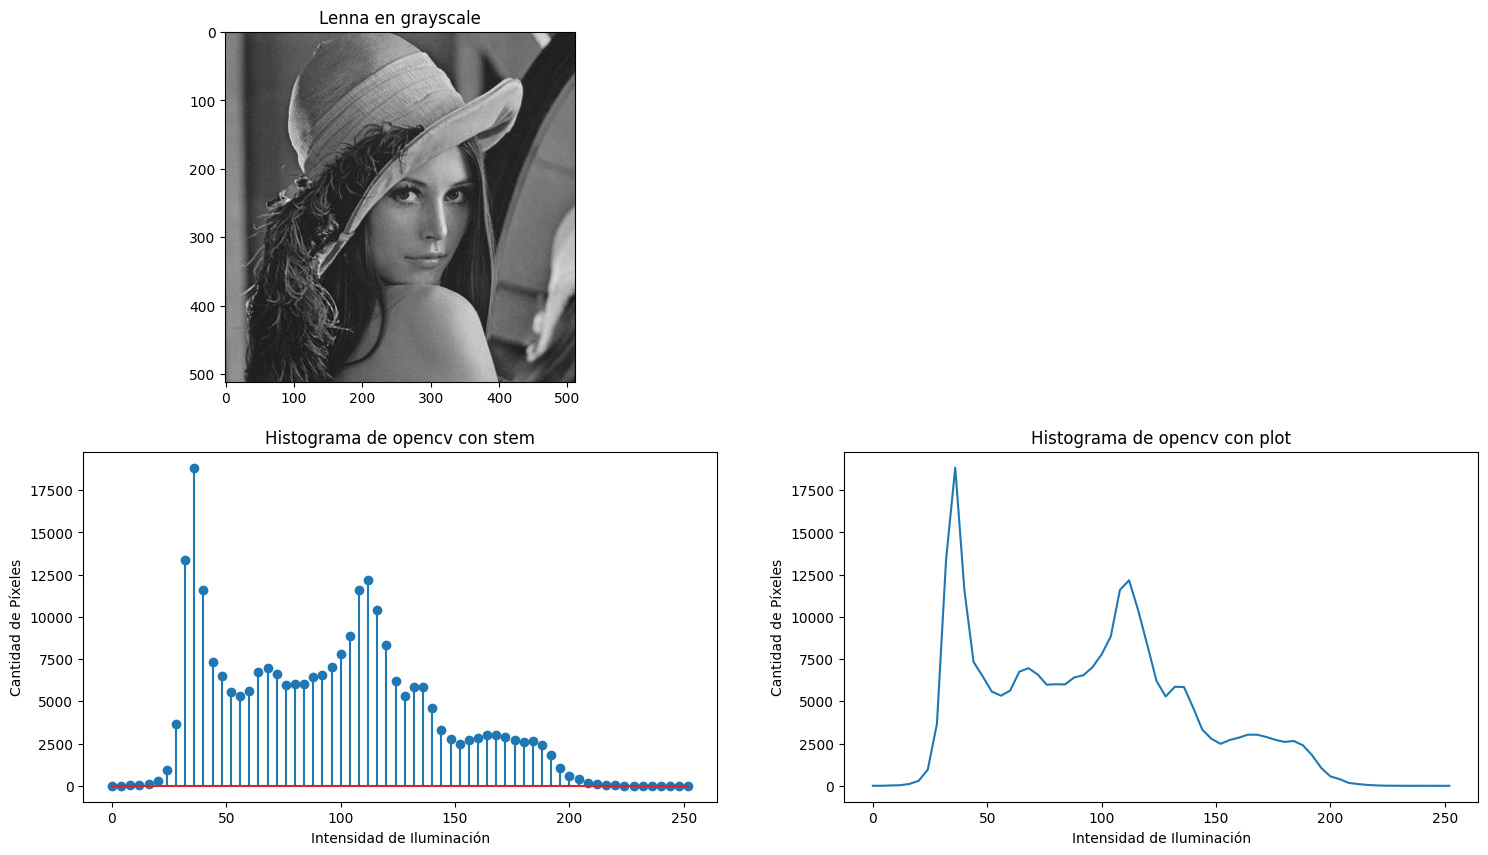

In [6]:
#en nuestro eje x graficaremos el rango de intensidades agrupados en los bins
#en nuestro eje y el conteo de cada bin
paso=int((histrange[1]-histrange[0])/histsize)
plt.figure(figsize=(18,10))
plt.subplot(221),plt.imshow(img,cmap='gray'), plt.title('Lenna en grayscale')
plt.subplot(223),plt.stem(range(histrange[0],histrange[1],paso),hist)
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles"), plt.title('Histograma de opencv con stem')
plt.subplot(224),plt.plot(np.arange(histrange[0],histrange[1],paso),hist)
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles"), plt.title('Histograma de opencv con plot')

**Opcional:**

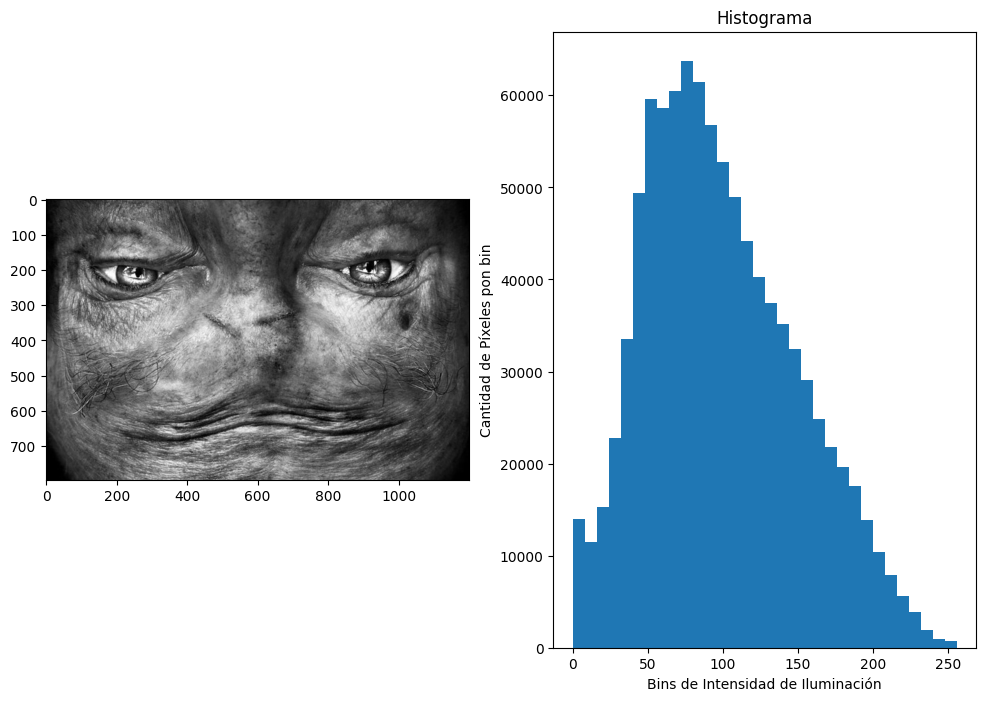

In [9]:
#El histograma se puede mostrar con matplotlib. No es necesario haberlo creado con openCV
#Carguemos otra imagen

#img = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)
img=cv2.imread('Imágenes necesarias/im_jonathan.jpeg', cv2.IMREAD_GRAYSCALE)
nbins=32
rango=[0,256]
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img,cmap='gray')#,vmin=0 ,vmax=255), plt.title('Imagen en grayscale')
plt.subplot(122), plt.hist(img.ravel(),nbins,rango)
#img.ravel() "estira" img en un vector, es decir concatena las filas de img en un solo vector
plt.xlabel("Bins de Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles pon bin")
plt.title("Histograma")
plt.show()

In [ ]:
print(np.min(img),np.max(img))

0 255


**Ejercicio:**
Qué conclusión sobre la imagen extrae del histograma?

Repita el procedimiento para la imagen ...

Podemos optar también por el histograma de un recorte de la imagen

'im_jonathan.jpeg'

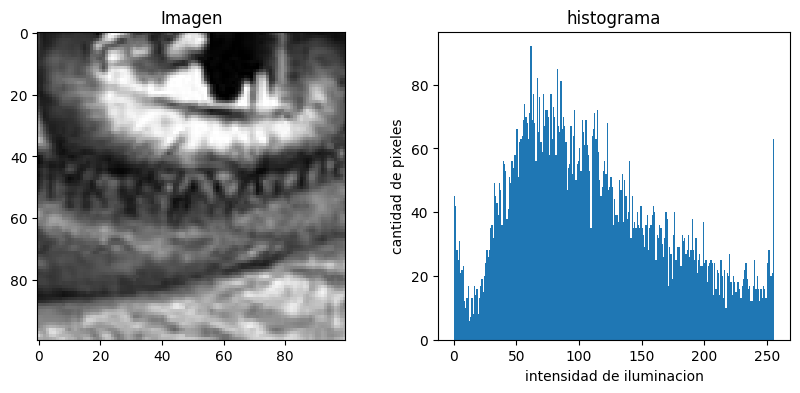

In [12]:
img=cv2.imread('Imágenes necesarias/im_jonathan.jpeg', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)
img=img[200:300,200:300]
plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(img , cmap='gray',vmin=0 ,vmax=255)
plt.title("Imagen")

nbins=256
imrange=[0 , 256]

#Función hist de matplotlib
#ravel() indica que devuelve un array 1-D
plt.subplot(122),plt.hist(img.ravel(), nbins, imrange )
plt.title('histograma')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')

#sin límites hace autoescalado de los ejes

plt.show()


In [13]:
print(np.min(img),np.max(img))

0 255


El modo de quedarse con un recorte es hacer una "mascara"


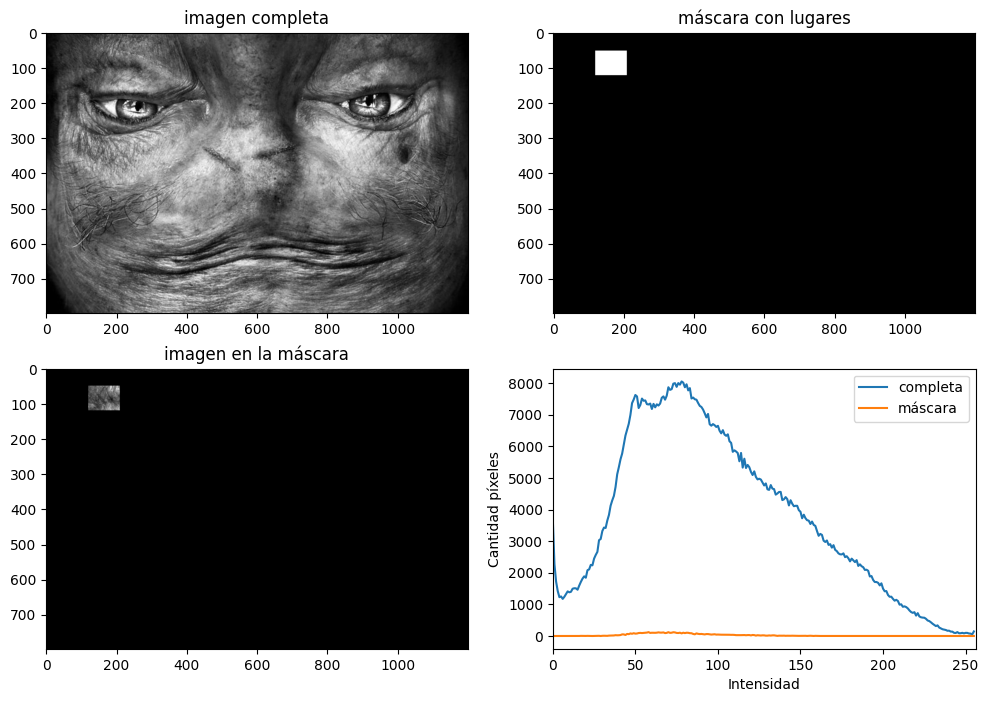

In [16]:
#Se puede estudiar el histograma de una parte de la imagen
#img = cv2.imread('daisy.jpg',0)
#img=img2[:,:,0]
img=cv2.imread('Imágenes necesarias/im_jonathan.jpeg', cv2.IMREAD_GRAYSCALE)
# creamos la mascara
mask = np.zeros(img.shape, np.uint8)
mask[50:120, 120:210] = 1

masked_img=img*mask

# Calculamos histograma con y sin mascara
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray'),plt.title('imagen completa')#, plt.axis('off')
plt.subplot(222), plt.imshow(mask,'gray'),plt.title('máscara con lugares')
plt.subplot(223), plt.imshow(masked_img, 'gray'), plt.title('imagen en la máscara')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask),plt.xlabel('Intensidad'),plt.ylabel("Cantidad píxeles"),plt.legend(['completa', 'máscara'])
plt.xlim([0,256])

plt.show()

## IMAGENES RGB. HISTOGRAMAS DE LOS 3 CANALES

In [21]:
#Histogramas de R, G y B
path='Imágenes necesarias/daisy.jpg'
img = cv2.imread(path)
cv2.imshow(img, 0)


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'winname'
>  - Can't convert object to 'str' for 'winname'
>  - Can't convert object to 'str' for 'winname'


In [ ]:

color = ('b','g','r')
for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.title('Histogramas')
plt.legend(['azul','verde','rojo'])
plt.show()

# Operaciones punto a punto

Modificar la intensidad de cada pixel

- Si $r$ es la intensidad original del pixel ($r=I(i,j)$)

- $T(r)$ será la intensidad del pixel en la imagen resultante (imagen trasformada $J(i,j)=T(r)$)
- Se transforma cada pixel, a todos (y cada uno) con la misma transformación
-Se modifica la intensidad del pixel pero no su posición


Esto es útil para hacer Mejora de la imagen

## Opciones para mejorar el contraste y la visualización?
+ Modificar el rango dinámico
+ Aclarar
+ Oscurecer
+ Ecualizar del histograma
+ etc.

## Modificar el rango
##(o sea el intervalo de los valores de intensidades)

- llevarlo a [0 - 1]
$$ r \rightarrow T(r)=\frac{r-min}{max-min}$$

- llevarlo a [0 - 255]
para uint8
$$ r \rightarrow T(r)=\left\lfloor 255\frac{r-min}{max-min} \right\rfloor, \,\, \leftarrow \, floor, redondeo$$

- disminuir el rango

$$ r \rightarrow T(r)=c \log{(r+1)},\ r\geq 0 , \ c<1$$





### Oscurecer una imagen (a mano)

**Ejemplo: oscurecer asignando a cada valor de intensidad**
$$ r \rightarrow T(r)=r/2$$

La matriz correspondiente a la imagen es de dimensión  (354, 364) 
Cada elemento es de tipo <class 'numpy.uint8'>
valor del pixel (0,0):  38
valor del pixel (70,70):  201


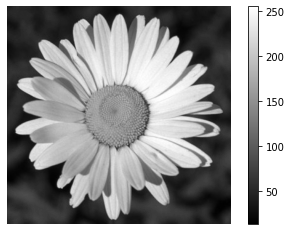

In [ ]:
path="daisy.jpg" # si el archivo est en la misma carpeta que la notebook asi anda bien, sino copio el path entero del archivo
f=cv2.imread(path,0)# Se crea una imagen monocroma del archivo

print("La matriz correspondiente a la imagen es de dimensión ",f.shape,
      "\nCada elemento es de tipo", type(f[0,0]))

print('valor del pixel (0,0): ' , f[0,0])
print('valor del pixel (70,70): ' , f[70,70])
plt.imshow(f,cmap="gray")
plt.axis('off')#para quitar la numeración de filas y columnas
plt.colorbar() #para la barra con la referencia de color
plt.show()

In [ ]:
#Oscurecer la imagen que está en memoria

g=f/2 #T(r)=r/2 Oscurece la imagen
g=g.astype('uint8')
print("Intensidad Píxel (70,70) original: ",f[70,70],"Su tipo de dato es", f.dtype)
print("Intensidad Píxel (70,70) luego de la transformación punto a punto: ",g[70,70],"Su tipo de dato es", g.dtype)
print()

print()
print('Máximo de la imagen original= ',f.max())
print()
print('Máximo de la imagen luego de la transformación punto a punto= ',g.max())

Intensidad Píxel (70,70) original:  201 Su tipo de dato es uint8
Intensidad Píxel (70,70) luego de la transformación punto a punto:  100 Su tipo de dato es uint8


Máximo de la imagen original=  255

Máximo de la imagen luego de la transformación punto a punto=  127


### Visualización

QUE PASÓ?


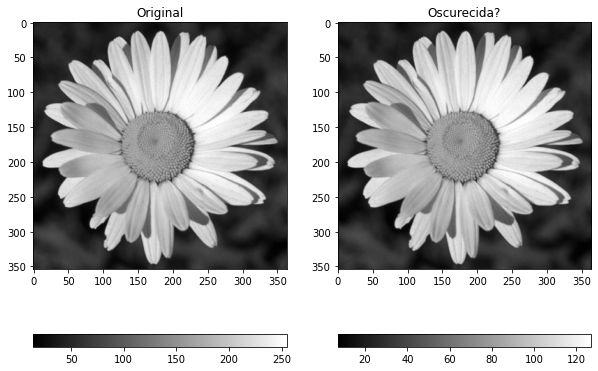

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(f,cmap='gray')#,vmin=0, vmax=255)
plt.colorbar(orientation='horizontal'), plt.title('Original')
plt.subplot(122),plt.imshow(g,cmap='gray')#,vmin=0, vmax=255)
plt.colorbar(orientation='horizontal'), plt.title('Oscurecida?')
print('QUE PASÓ?')

**Ejercicio:
cómo la aclararía?**

## Ajuste gamma (sin modificar el rango)
**Condición Importante**: vale para el rango de intensidades $ 0\leq r \leq 1$:

$$T(r)=r^{\gamma},$$

$\,\gamma $ parámetro (fijo y positivo) de la función

### Para Aclarar

$$T(r)=r^{\gamma},\,\gamma <1$$

Por ejemplo $T(r)=r^{\frac{1}{2}}=\sqrt{r}$

### Para Oscurecer

$$T(r)=r^{\gamma},\,\gamma >1$$

Por ejemplo $T(r)=r^{2}$

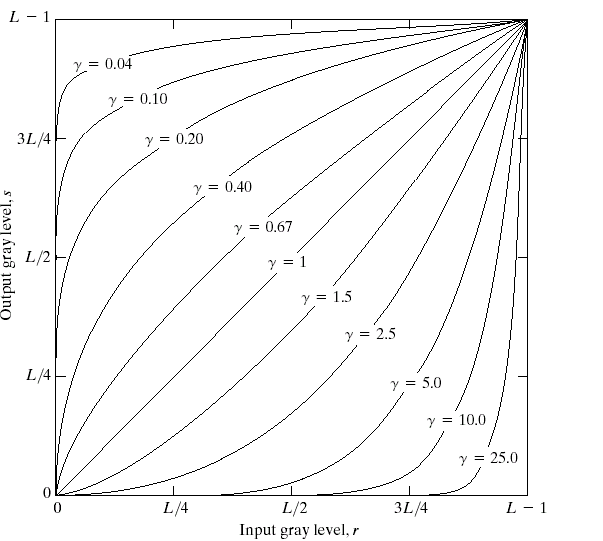

Qué valor de gamma usaría para mejorar la siguiente imagen (mayor o menor que 1?)

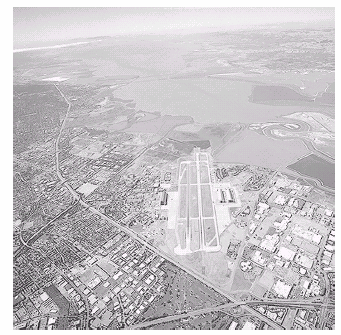

Apliquemos una transformación gamma a una imagen de  tipo "bandas", con datos flotantes con intensidades en [0 1] .

Para cada intensidad r :  $T(r)=r^{\gamma}$

In [ ]:
#generamos una imagen monocroma de bandas
bandas=np.zeros((20,20))
creciente=np.linspace(0,1,20)

for i in range(20):
  bandas[i,:]=creciente

print(bandas.dtype,bandas.shape)

float64 (20, 20)


(<matplotlib.colorbar.Colorbar at 0x7f740962ae50>,
 Text(0.5, 1.0, 'Original con ajuste gamma'))

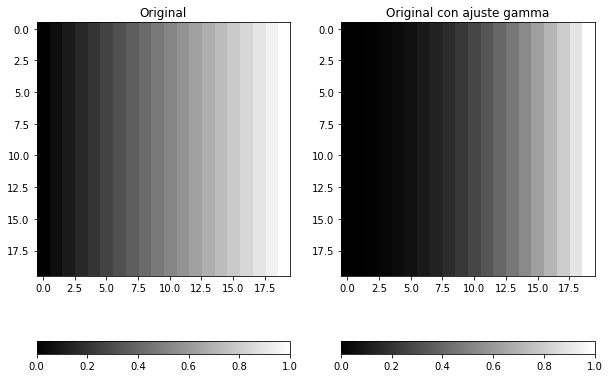

In [ ]:
from skimage import data, exposure #
gamma=2
bandas_ajuste = exposure.adjust_gamma(bandas, gamma)
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(bandas,cmap='gray')
plt.colorbar(orientation='horizontal'), plt.title('Original')
plt.subplot(122),plt.imshow(bandas_ajuste,cmap='gray')
plt.colorbar(orientation='horizontal'), plt.title('Original con ajuste gamma')

### ¿Que ocurre si la Imagen no es float?

$T(r)=r^{\gamma}$ para $0\leq r \leq 1 $

$T(r)=\left\lfloor 255\left(\frac{r}{255}\right)^{\gamma}\right\rfloor$ para $0\leq r \leq 255 $ (uint8)

$\gamma $ parámetro (fijo y positivo) de la función

* Para Aclarar: $\gamma <1$ (ejemplo $T(r)=r^{\frac{1}{2}}=\sqrt{r}$)

* Para Oscurecer $\gamma >1$ (ejemplo $T(r)=r^{2}$)

La siguiente funcion, pasa la imagen uint8 a flotante y luego usamos el ajuste gamma. Luego recuperamos la imagen en uint8 multiplicando por 255 y redondeando.

In [ ]:
from skimage import data, exposure, img_as_float
gamma=0.5
img=f.copy()
img_float = img_as_float(img) #imagen original pasada a flotante en [0 1]
print(f.dtype,img_float.dtype,img.min(),img.max(),img_float.min(),img_float.max())


uint8 float64 14 255 0.054901960784313725 1.0


In [ ]:
img_gamma = exposure.adjust_gamma(img_float, gamma) #esta es la imagen con el ajuste gamma en flotante
img_gamma_u8=(gamma_corr*255).astype('uint8') #esta es la imagen con el ajuste gamma en uint8
print(img[100,100],img_gamma[100,100],img_gamma_u8[100,100])


214 0.9160871608501616 233


(<matplotlib.colorbar.Colorbar at 0x7f7408f97410>,
 Text(0.5, 1.0, 'Original con ajuste gamma'))

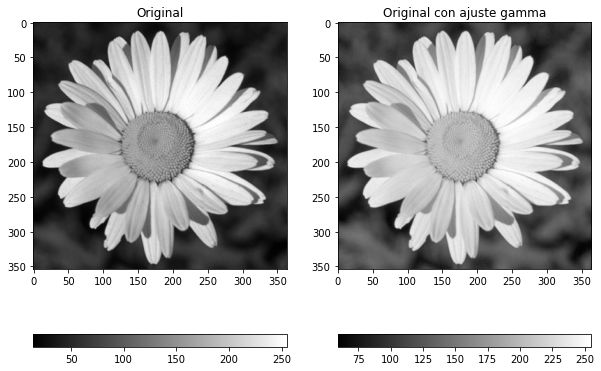

In [ ]:
#graficamos la original en uint8 y la ajustada por gamma en uint8
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(img,cmap='gray')#,vmin=0, vmax=255)
plt.colorbar(orientation='horizontal'), plt.title('Original')
plt.subplot(122),plt.imshow(img_gamma_u8,cmap='gray')#,vmin=0, vmax=255)
plt.colorbar(orientation='horizontal'), plt.title('Original con ajuste gamma')

https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.adjust_gamma


## Ecualización del histograma
La ecualización del histograma pretende una distribución uniforme de las intensidades. Esto mejora el contraste.

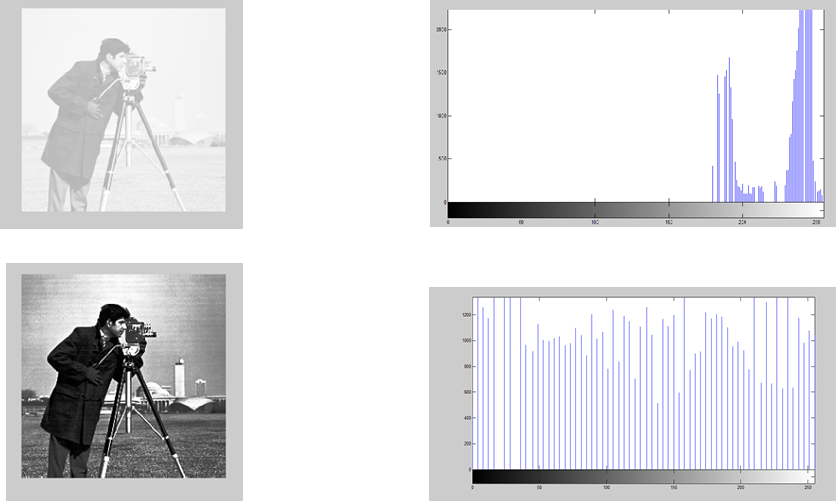

#### Pasos para ecualizar un histograma
1- Se calcula la frecuencia de cada intensidad r como $n_i/n$. $n_i=$ Número de píxeles con esa intensidad. $n=$Número total de píxeles.

2- Se acumulan dichos valores. O sea que a cada intensidad le corresponden las frecuencias acumuladas hasta ese valor.

3- Se multiplican los valores acumulados por L-1, siendo L la máxima intensidad. Por ejemplo L-1=255
Se redondean los valores al entero más próximo (función floor o piso)
4- Cada valor de intensidad r se reemplaza por el nuevo valor obtenido s.


- Para uint8 [0-255] se calcula:
$$s=T(r)=\left\lfloor 255*\sum_{i=1}^{r}{\frac{n_i}{n}}\right\rfloor,$$

- Para llevarlo a [0 -1]:

$$s=T(r)=\sum_{i=1}^{r}{\frac{n_i}{n}},$$

en ambas ecuaciones: $n_i=\#$ pixeles con intensidad $i$ y $n=MN=\#$ de pixeles de la imagen  

![image.png](attachment:image.png)


#### Ecualizar imagen ortopantomografía2.png

* Ecualización del histograma: $s=T(r)=\left\lfloor 255*\sum_{i=1}^{r}{\frac{n_i}{n}}\right\rfloor,$ para uint8  ($\left\lfloor \,\right\rfloor$ notación de piso/floor, redondeo entero)

En openCV: **cv2.equalizeHist**


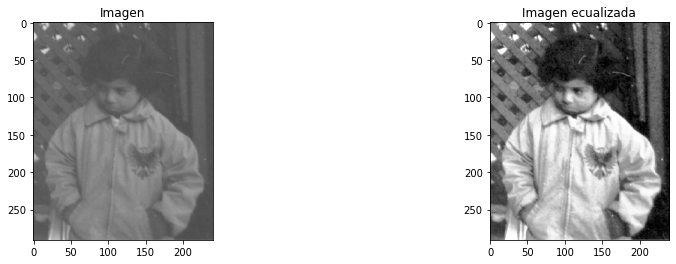

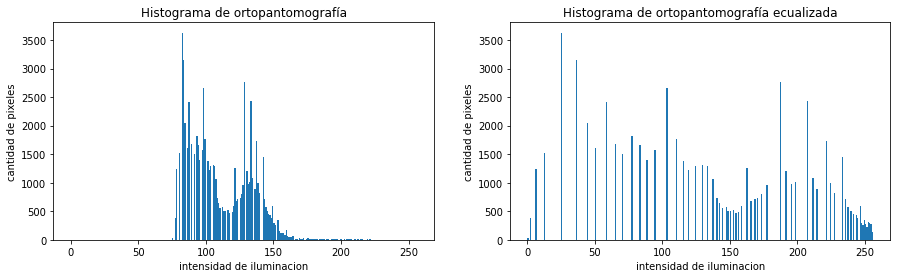

In [ ]:
#continuación
img = cv2.imread('pout.png', cv2.IMREAD_GRAYSCALE)
img_equalizada = cv2.equalizeHist(img)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(img_equalizada, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen ecualizada')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] )
axs[0].set_title('Histograma de ortopantomografía')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_equalizada[:,:].ravel(), 256,[0,256] )
axs[1].set_title('Histograma de ortopantomografía ecualizada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')
plt.show()


In [ ]:
#https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

**Para pensar: El proceso de equalización será reversible?, el ajuste Gamma?**

**Ejercicio: elegir dos imágenes con bajo contraste y modificarla ecualizando su histograma**

## Negativo de una Imagen
* $T(r)=255-r$, para unint8
* $T(r)=1-r$, para $0\leq r\leq 1$


**Ejercicio**

Calcular el negativo de una imagen y su histograma, y a éste compararlo con el histograma original. Guardar la imagen obtenida

In [ ]:
img = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE)
print(img[100,100])

110


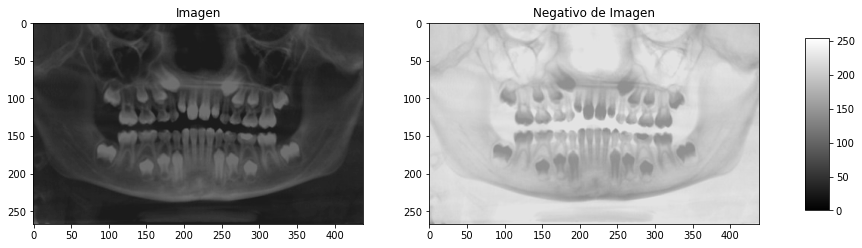

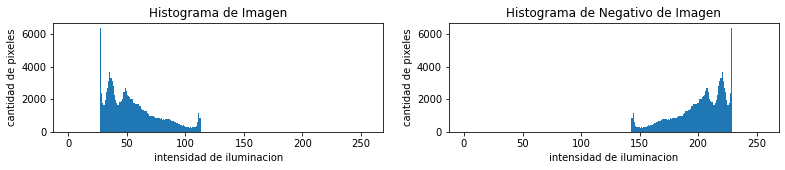

In [ ]:
img = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)
img_negativo= 255-img

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(13)
im=axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(img_negativo, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Negativo de Imagen')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.2, 0.025, 0.6])
fig.colorbar(im, cax=cbar_ax)

plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(2)
fig.set_figwidth(13)
axs[0].hist(img[:,:].ravel(), 256,[0,256] )
axs[0].set_title('Histograma de Imagen')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_negativo[:,:].ravel(), 256,[0,256] )
axs[1].set_title('Histograma de Negativo de Imagen')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')

plt.show()

**Ejercicio: Calcule el histograma de la componente roja de una imagen a elección (puede ser la flor 'daysy,jpg'), luego calcule el negativo de la componente roja y su histograma correspondiente, y a éste compararlo con el histograma original.**

#### Reducción de de resolución radiométrica  
Reducción de 256 Niveles de Gris a n Niveles de Gris.


#### Ejemplo a mano de reducción de  256 a n=5 niveles de gris

In [ ]:
#De 256 a 5 niveles de gris
img = cv2.imread('lenna.jpg',0)#

filas=img.shape[0]
columnas=img.shape[1]

res1=np.zeros((filas,columnas))
res1=np.uint8(res1)
print(res1.shape)
img2=img.copy()
for i in range(filas):
    for j in range(columnas):
        if ((img2[i,j])<50): res1[i,j]=25
        elif((img2[i,j]<100)):res1[i,j]=75
        elif ((img2[i,j]<150)):res1[i,j]=125
        elif((img2[i,j]<200)):res1[i,j]=175
        else: res1[i,j]=225

print('zoom 256 niveles:',img[104:109,104:109])
print('zoom 5 niveles:',res1[104:109,104:109])
cv2.imwrite('nueva5.jpg',res1,[cv2.IMWRITE_JPEG_QUALITY, 60]) #compresión JPEG

(512, 512)
zoom 256 niveles: [[ 93  91  94  97  91]
 [111  99  89  85  82]
 [110 100  92  92  91]
 [101  98  97  99  97]
 [101 101  98  93  89]]
zoom 5 niveles: [[ 75  75  75  75  75]
 [125  75  75  75  75]
 [125 125  75  75  75]
 [125  75  75  75  75]
 [125 125  75  75  75]]


True

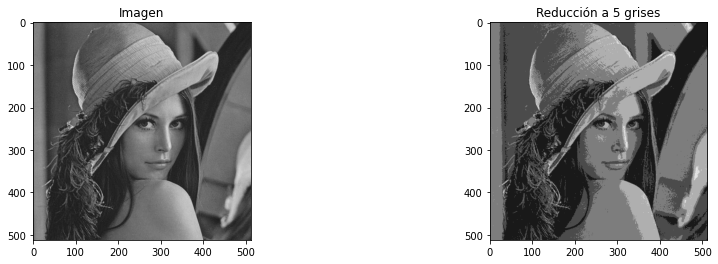

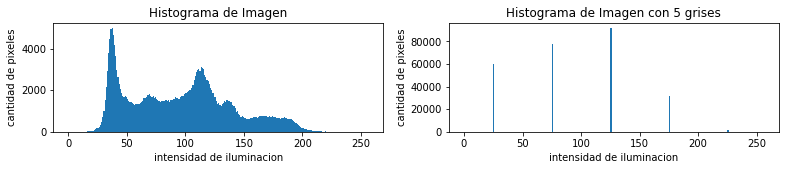

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img2, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(res1, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Reducción a 5 grises')
plt.show()
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(2)
fig.set_figwidth(13)
axs[0].hist(img2[:,:].ravel(), 256,[0,256] )
axs[0].set_title('Histograma de Imagen')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(res1[:,:].ravel(), 256,[0,256] )
axs[1].set_title('Histograma de Imagen con 5 grises')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')

plt.show()


**Ejercicio plus: Definir una función con dos parámetros de entrada, una imagen monocroma uint8 y un número entero n (entre 2 y 128) y cómo resultado devuelva la imagen con k niveles de gris. Implementarla con n=8 y mostrar el resultado. (ayuda: evitar usar el if, y el for de ser posible)**